# Analyzing the results for `lincs_rdkit_hparam`

This is part 1, the results of sweeping all hyperparameter for rdkit

In [3]:
from pathlib import Path
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import seml
from matplotlib import pyplot as plt

matplotlib.style.use("fivethirtyeight")
matplotlib.style.use("seaborn-talk")
matplotlib.rcParams['font.family'] = "monospace"
plt.rcParams['savefig.facecolor'] = 'white'
sns.set_context("poster")
pd.set_option('display.max_columns', 100)

In [4]:
results = seml.get_results(
    "lincs_rdkit_hparam",
    to_data_frame=True,
    fields=["config", "result", "seml", "config_hash"],
    states=["COMPLETED"],
    filter_dict={"batch_id": 1} # just the first batch (rdkit only)
)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/root/miniconda3/envs/chemCPA/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [5]:
results.loc[:, [c for c in results.columns if 'disentanglement' in c]]

,result.perturbation disentanglement,result.covariate disentanglement
0,[0.28051891922950745],[[0.7413204908370972]]
1,[0.11474837362766266],[[0.5766443014144897]]
2,[0.1912102848291397],[[0.9280106425285339]]
3,[0.16337567567825317],[[0.9344181418418884]]
4,[0.5697609782218933],[[0.9994765520095825]]
5,[0.5573741793632507],[[0.999381422996521]]
6,[0.5902840495109558],[[0.9990959167480469]]
7,[0.18657910823822021],[[0.5789440274238586]]
8,[0.292160302400589],[[0.8921666145324707]]
9,[0.19089308381080627],[[0.8161171078681946]]


In [6]:
good_disentanglement = results['result.perturbation disentanglement'].apply(lambda x: x[0]) < 0.2

In [7]:
results.loc[good_disentanglement, [c for c in results.columns if 'result' in c]]

,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.loss_multi_task,result.elapsed_time_min,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.training,result.test,result.ood,result.total_epochs
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",[13],"[3683.089559674263, 2610.100167900324, 2397.98...","[52531.12997817993, 51722.07457637787, 50320.3...","[17129.572284698486, 16699.03818631172, 16632....","[201103.4572128146, 861.1948589315871, 707.084...","[6.671873705165378, 0.0011177337734800605, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",29.063970,[0.11474837362766266],[0.007470143217395442],[[0.5766443014144897]],[[0.1397915929555893]],"[[0.8842644291384022, 0.6777013628380489, 1.78...","[[0.8748094226597178, 0.6215930675117554, 0.0,...","[[0.8762720873101749, 0.6225598194261168, 0.0,...",13
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",[12],"[6643.805382549763, 4314.72684147954, 3821.758...","[103191.04767990112, 99562.0192117691, 98283.8...","[34398.39072275162, 33439.34608411789, 33472.2...","[10656.57669924852, 4027.129918797544, 39.3213...","[4.406137513763154, 0.0235008804796234, 0.0966...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",50.959378,[0.1912102848291397],[0.007470143217395442],[[0.9280106425285339]],[[0.1397915929555893]],"[[0.8615895791235095, 0.6278511643357909, 2.13...","[[0.8775527772509578, 0.6228333661715462, 0.0,...","[[0.878857115742807, 0.6251184172277068, 0.0, ...",12
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[14],"[8253.18236157298, 5368.166206896305, 4667.589...","[103764.34209346771, 98551.98429918289, 97942....","[35184.27918744087, 33455.351595401764, 33494....","[14053.489491915781, 303.35569871084857, 3109....","[4.8768792713854054, 0.2234894739417541, 0.216...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",54.813976,[0.16337567567825317],[0.007470143217395442],[[0.9344181418418884]],[[0.1397915929555893]],"[[0.8891906022683315, 0.6917068472586733, 0.00...","[[0.8816304097385421, 0.6350442231316203, 0.0,...","[[0.883949806718692, 0.6411095516186058, 0.0, ...",14
7,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",[13],"[3682.8370976746082, 2493.826750576496, 2305.6...","[51818.32960033417, 50336.629073143005, 49263....","[16873.380880355835, 16639.18243932724, 16566....","[77741.81552194298, 178.43850536104023, 41.365...","[4.756717810780511, 0.010357043615789152, 0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",27.106821,[0.18657910823822021],[0.007470143217395442],[[0.5789440274238586]],[[0.1397915929555893]],"[[0.8913233865829577, 0.6816926804360975, 0.0,...","[[0.8800465037813295, 0.6241440325613542, 0.0,...","[[0.882343351538948, 0.6281777210449925, 0.0, ...",13
9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",[13],"[13487.801239281893, 8848.316076993942, 7149.1...","[200279.03373241425, 195685.34693670273, 19486...","[66709.28584480286, 66771.67021918297, 66830.2...","[32432.934681509043, 1331.5324302139948, 1.176...","[2.6147945363932905, 0.6385516228797176, 0.634...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",87.593783,[0.19089308381080627],[0.007470143217395442],[[0.8161171078681946]],[[0.1397915929555893]],"[[0.8840110656868045, 0.6214022189596433, 2.05...","[[0.8842307528665169, 0.632760866291279, 0.0, ...","[[0.8869947094654506, 0.6407320763627812, 0.0,...",13
12,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",[13],"[3803.554649949074, 2412.9276493489742, 2015.6...","[51625.263171195984, 49555.11098957062, 49033....","[16735.354615688324, 16585.56525850296, 16635....","[21086.105610386236, 13.556415501347043, 26.60...","[2.4822325579935125, 0.015008200476707145, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",30.014833,[0.18718180060386658],[0.007470143217395442],[[0.6744222640991211]],[[0.139791592

## Preprocessing the results dataframe

In [36]:
sweeped_params = [
    "config.model.hparams.dim",
    "config.model.hparams.dropout",
    "config.model.hparams.dosers_width",
    "config.model.hparams.dosers_depth",
    "config.model.hparams.dosers_lr",
    "config.model.hparams.dosers_wd",
    "config.model.hparams.autoencoder_width",
    "config.model.hparams.autoencoder_depth",
    "config.model.hparams.autoencoder_lr",
    "config.model.hparams.autoencoder_wd",
    "config.model.hparams.adversary_width",
    "config.model.hparams.adversary_depth",
    "config.model.hparams.adversary_lr",
    "config.model.hparams.adversary_wd",
    "config.model.hparams.adversary_steps",
    "config.model.hparams.reg_adversary",
    "config.model.hparams.penalty_adversary",
    "config.model.hparams.batch_size",
    "config.model.hparams.step_size_lr",
    "config.model.hparams.embedding_encoder_width",
    "config.model.hparams.embedding_encoder_depth",
]

In [9]:
# percentage of training runs that resulted in NaNs
import math

nan_results = results[results["result.loss_reconstruction"].apply(lambda x: math.isnan(sum(x)))]
results_clean = results[~results["result.loss_reconstruction"].apply(lambda x: math.isnan(sum(x)))].copy()
print(len(nan_results) / len(results))

0.0


In [10]:
results_clean['result.loss_reconstruction'][0]

[15044.188961267471,
 10175.162970870733,
 7446.653169259429,
 5864.086495377123,
 5201.543816482648,
 4923.831756331027,
 4420.896165776998,
 3984.5165025969036,
 3610.9099107743823,
 3286.4786687721403,
 2963.684443138791,
 2721.3654526792234,
 2411.3093119564764,
 2197.1925890960856,
 1999.8535790167396,
 1852.6084310402657,
 1563.0890916007324,
 1435.9550399662746,
 1335.3644058561817,
 1180.5419455220708,
 1038.2649695835012,
 950.2468244515007,
 856.5616777150608]

In [11]:
results_clean["config.model.embedding.model"].value_counts()

rdkit    25
Name: config.model.embedding.model, dtype: int64

In [20]:
# calculate some stats
get_mean = lambda x: np.array(x)[-1, 0]
get_mean_de = lambda x: np.array(x)[-1, 1]

results_clean["result.training_mean"] = results_clean["result.training"].apply(get_mean)
results_clean["result.training_mean_de"] = results_clean["result.training"].apply(get_mean_de)
results_clean["result.val_mean"] = results_clean["result.test"].apply(get_mean)
results_clean["result.val_mean_de"] = results_clean["result.test"].apply(get_mean_de)
results_clean["result.test_mean"] = results_clean["result.ood"].apply(get_mean)
results_clean["result.test_mean_de"] = results_clean["result.ood"].apply(get_mean_de)
results_clean["result.perturbation disentanglement"] = results_clean["result.perturbation disentanglement"].apply(lambda x: x[0])


results_clean

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.multi_task,config.model.additional_params.patience,config.model.additional_params.seed,config.model.append_ae_layer,config.model.embedding.directory,config.model.embedding.model,config.model.enable_cpa_mode,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.reg_adversary_cov,config.model.hparams.reg_multi_task,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.loss_multi_task,result.elapsed_time_min,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.training,result.test,result.ood,result.total_epochs,result.training_mean,result.training_mean_de,result.val_mean,result.val_mean_de,result.test_mean,result.test_mean_de
0,1,5f26ced4d0147f500b713a2c14a72a92,chemCPA/experiments_run.py,lincs_rdkit_hparam,/root/chemCPA/sweeps/logs,chemCPA,/root/chemCPA,"[[chemCPA/__init__.py, 6556ddcb257222055dc3b83...",/root/chemCPA/sweeps/logs/lincs_rdkit_hparam_1...,1,lincs_rdkit_hparam,cell_type,project_folder/datasets/lincs_full_smiles_scip...,rank_genes_groups_cov,pert_dose,cov_drug_name,condition,canonical_smiles,random_split,True,lincs,ReLU,amortized,False,10,1337,False,project_folder/embeddings,rdkit,False,2,0.000364,2,7.459343e-07,128,5,0.000561,1.329292e-07,512,32,32,1,0.000561,1.329292e-07,512,0.187270,3,512,2.368864,15.355287,8.605035,0,50,False,None,None,./,False,1,False,1200,1500,True,True,project_folder/sweeps/checkpoints,710646562,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[22],"[15044.188961267471, 10175.162970870733, 7446....","[206029.00220632553, 195903.33058786392, 19516...","[68785.79821324348, 67159.83934092522, 66973.3...","[6001.4633620469585, 237.9134303013456, 15.311...","[9.745654623057362, 0.7362496073164948, 0.3753...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",135.828441,0.280519,[0.007470143217395442],[[0.7413204908370972]],[[0.1397915929555893]],"[[0.8890437077962441, 0.6108059927766735, 0.00...","[[0.8847639906494769, 0.634733968523458, 0.0, ...","[[0.8866728618154217, 0.6384594702958261, 0.0,...",22,0.889044,0.610806,0.884764,0.634734,0.886673,0.638459

In [24]:
results_clean.sort_values(by='result.test_mean', ascending=False)[['config_hash', 'result.test_mean']]

,config_hash,result.test_mean
16,d26e192318c5fd9bc5196742b09294cf,0.924898
20,796be7ba1cf075102f4f47f36c57e9ea,0.896174
10,d2d537f3a0c626b8377ec277e29fad57,0.893917
8,1ea43848802004484515c9c264e35c56,0.893148
4,f0bebbaddf991bd5adb81004e9e48143,0.891040
14,dae7808c4cf7ea1f30f77a9ba1eb663e,0.888521
15,a50814db50ce25ae4b30e274e8338e46,0.888456
13,4834c14561623cc8df5b76b438515f13,0.887514
22,6ae0e046b35c679d3b58afb039154745,0.887224
9,5f19e39f551026ca9f252e2bcc52971b,0.886995


In [25]:
results_clean.sort_values(by='result.test_mean_de', ascending=False)[['config_hash', 'result.test_mean_de']]

,config_hash,result.test_mean_de
16,d26e192318c5fd9bc5196742b09294cf,0.802765
20,796be7ba1cf075102f4f47f36c57e9ea,0.673504
10,d2d537f3a0c626b8377ec277e29fad57,0.667678
14,dae7808c4cf7ea1f30f77a9ba1eb663e,0.659469
8,1ea43848802004484515c9c264e35c56,0.659347
17,680145cc25fec90a6c61a9df0980c7aa,0.647577
4,f0bebbaddf991bd5adb81004e9e48143,0.644601
22,6ae0e046b35c679d3b58afb039154745,0.641637
3,a4360444ad0c50d46ba4f293a0d2559a,0.641110
9,5f19e39f551026ca9f252e2bcc52971b,0.640732


## Look at early stopping

In [32]:
sweeped_params

['model.hparams.dim',
 'model.hparams.dropout',
 'model.hparams.dosers_width',
 'model.hparams.dosers_depth',
 'model.hparams.dosers_lr',
 'model.hparams.dosers_wd',
 'model.hparams.autoencoder_width',
 'model.hparams.autoencoder_depth',
 'model.hparams.autoencoder_lr',
 'model.hparams.autoencoder_wd',
 'model.hparams.adversary_width',
 'model.hparams.adversary_depth',
 'model.hparams.adversary_lr',
 'model.hparams.adversary_wd',
 'model.hparams.adversary_steps',
 'model.hparams.reg_adversary',
 'model.hparams.penalty_adversary',
 'model.hparams.batch_size',
 'model.hparams.step_size_lr',
 'model.hparams.embedding_encoder_width',
 'model.hparams.embedding_encoder_depth']

In [38]:
results_clean[results_clean['config_hash'] == 'd26e192318c5fd9bc5196742b09294cf'][sweeped_params]

,config.model.hparams.dim,config.model.hparams.dropout,config.model.hparams.dosers_width,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.autoencoder_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.adversary_width,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_wd,config.model.hparams.adversary_steps,config.model.hparams.reg_adversary,config.model.hparams.penalty_adversary,config.model.hparams.batch_size,config.model.hparams.step_size_lr,config.model.hparams.embedding_encoder_width,config.model.hparams.embedding_encoder_depth
16,64,0.152121,256,3,0.000406,8.179499e-08,512,4,0.000406,8.179499e-08,256,4,0.000251,3.320559e-07,2,12.439367,2.014848,128,50,512,4


In [12]:
results_clean

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.multi_task,config.model.additional_params.patience,config.model.additional_params.seed,config.model.append_ae_layer,config.model.embedding.directory,config.model.embedding.model,config.model.enable_cpa_mode,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.reg_adversary_cov,config.model.hparams.reg_multi_task,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.loss_multi_task,result.elapsed_time_min,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.training,result.test,result.ood,result.total_epochs,result.training_mean,result.training_mean_de,result.val_mean,result.val_mean_de,result.test_mean,result.test_mean_de
0,1,5f26ced4d0147f500b713a2c14a72a92,chemCPA/experiments_run.py,lincs_rdkit_hparam,/root/chemCPA/sweeps/logs,chemCPA,/root/chemCPA,"[[chemCPA/__init__.py, 6556ddcb257222055dc3b83...",/root/chemCPA/sweeps/logs/lincs_rdkit_hparam_1...,1,lincs_rdkit_hparam,cell_type,project_folder/datasets/lincs_full_smiles_scip...,rank_genes_groups_cov,pert_dose,cov_drug_name,condition,canonical_smiles,random_split,True,lincs,ReLU,amortized,False,10,1337,False,project_folder/embeddings,rdkit,False,2,0.000364,2,7.459343e-07,128,5,0.000561,1.329292e-07,512,32,32,1,0.000561,1.329292e-07,512,0.187270,3,512,2.368864,15.355287,8.605035,0,50,False,None,None,./,False,1,False,1200,1500,True,True,project_folder/sweeps/checkpoints,710646562,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[22],"[15044.188961267471, 10175.162970870733, 7446....","[206029.00220632553, 195903.33058786392, 19516...","[68785.79821324348, 67159.83934092522, 66973.3...","[6001.4633620469585, 237.9134303013456, 15.311...","[9.745654623057362, 0.7362496073164948, 0.3753...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",135.828441,0.280519,[0.007470143217395442],[[0.7413204908370972]],[[0.1397915929555893]],"[[0.8890437077962441, 0.6108059927766735, 0.00...","[[0.8847639906494769, 0.634733968523458, 0.0, ...","[[0.8866728618154217, 0.6384594702958261, 0.0,...",22,0.889044,0.610806,0.884764,0.634734,0.886673,0.638459

Text(0.5, 1.0, 'Total epochs before final stopping (min 125)')

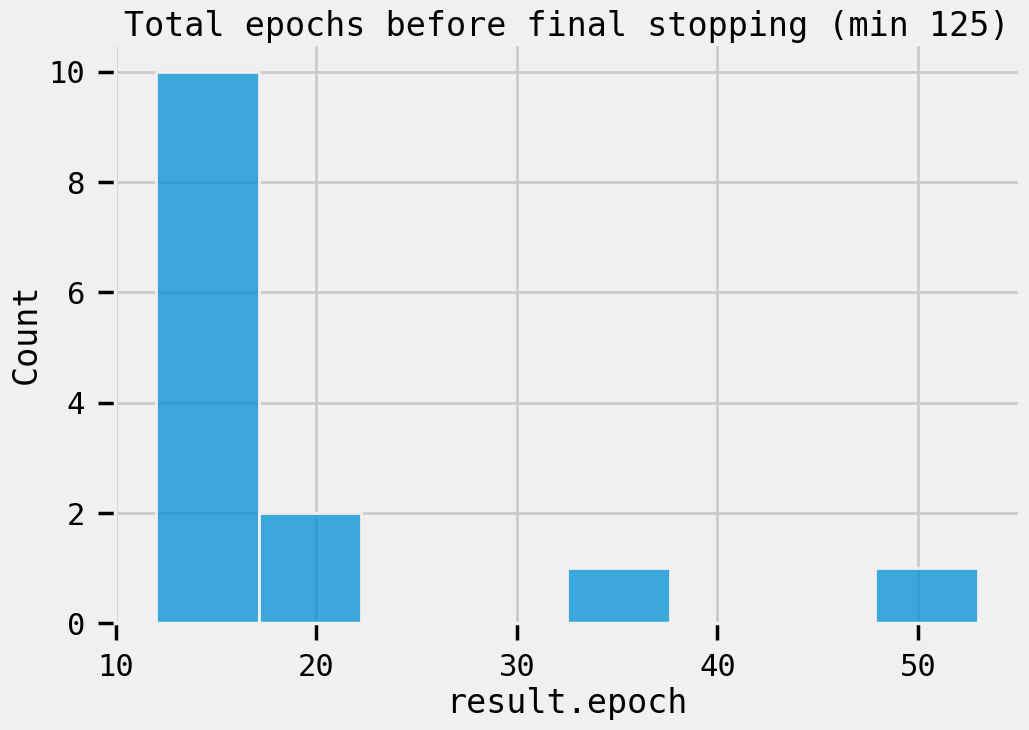

In [11]:
ax = sns.histplot(data=results_clean["result.epoch"].apply(max))
ax.set_title("Total epochs before final stopping (min 125)")

## Look at $r^2$ reconstruction

### DE genes

/tmp/ipykernel_394932/1189481280.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_394932/1189481280.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_394932/1189481280.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


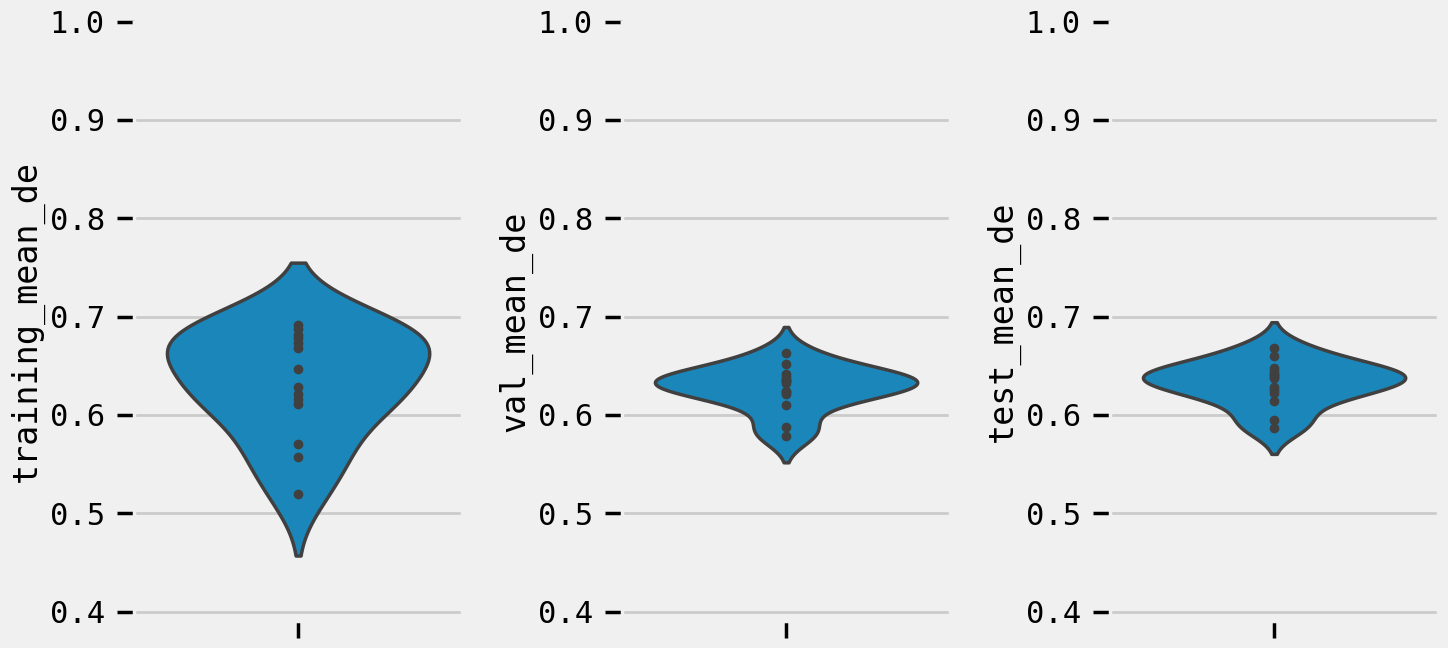

In [13]:
rows = 1 
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(5*cols, 7*rows), sharex=True)

for i, y in enumerate(("result.training_mean_de", "result.val_mean_de", "result.test_mean_de")):
    sns.violinplot(data=results_clean, x="config.model.embedding.model", y=y, inner='point' ,ax=ax[i])
    ax[i].set_ylim([0.39,1])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
    plt.tight_layout()

### All genes

/tmp/ipykernel_394932/1388806388.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_394932/1388806388.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_394932/1388806388.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


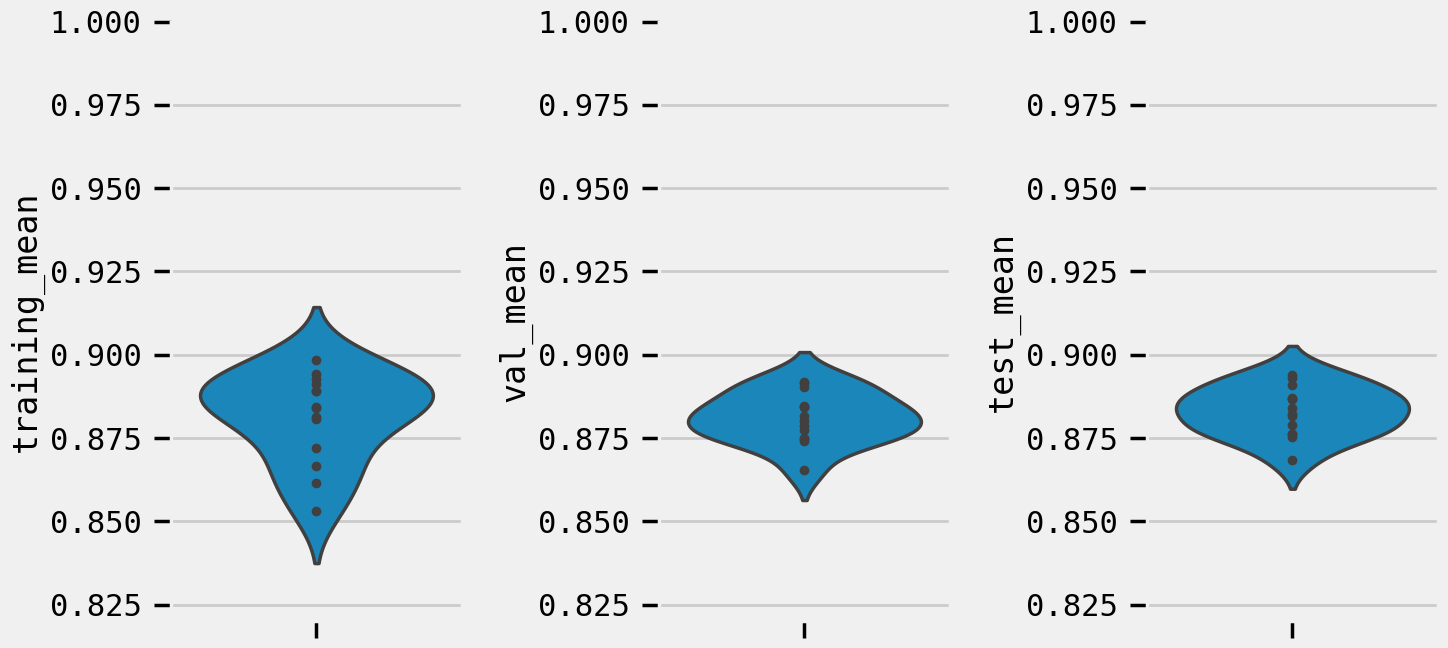

In [14]:
rows = 1 
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(5*cols, 7*rows), sharex=True)

for i, y in enumerate(("result.training_mean", "result.val_mean", "result.test_mean")):
    sns.violinplot(data=results_clean, x="config.model.embedding.model", y=y, inner='point' ,ax=ax[i])
    ax[i].set_ylim([0.82,1])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
    plt.tight_layout()

## Look at disentanglement scores

/tmp/ipykernel_394932/3759304966.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


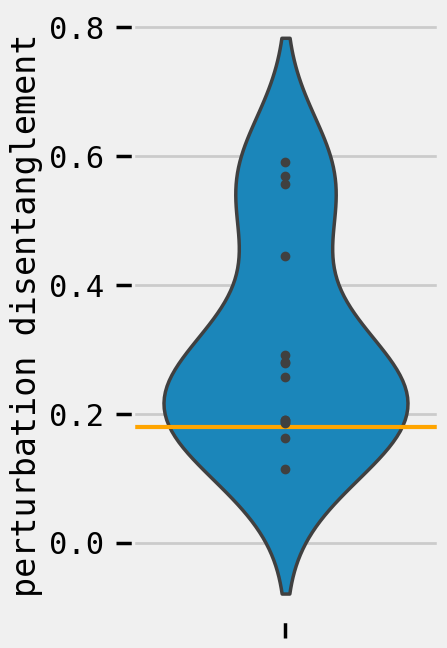

In [15]:
rows = 1 
cols = 1
fig, ax = plt.subplots(rows, cols, figsize=(5*cols, 7*rows), sharex=True)

for y in ["result.perturbation disentanglement"]:
    sns.violinplot(data=results_clean, x="config.model.embedding.model", y=y, inner='point' ,ax=ax)
    # ax[i].set_ylim([0,1])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.axhline(0.18, color='orange')
    ax.set_xlabel('')
    ax.set_ylabel(y.split('.')[-1])
    plt.tight_layout()

## Subselect to disentangled models

In [14]:


performance_condition = lambda emb, max_entangle: (results_clean["config.model.embedding.model"] == emb) & (results_clean["result.perturbation disentanglement"] < max_entangle)

best = []
for embedding in list(results_clean["config.model.embedding.model"].unique()):
    df = results_clean[performance_condition(embedding, 0.18)]
    print(embedding, len(df))
    best.append(df.sort_values(by="result.val_mean_de", ascending=False).head(3))

best = pd.concat(best)

rdkit 2


/tmp/ipykernel_323151/3361881384.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_323151/3361881384.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_323151/3361881384.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


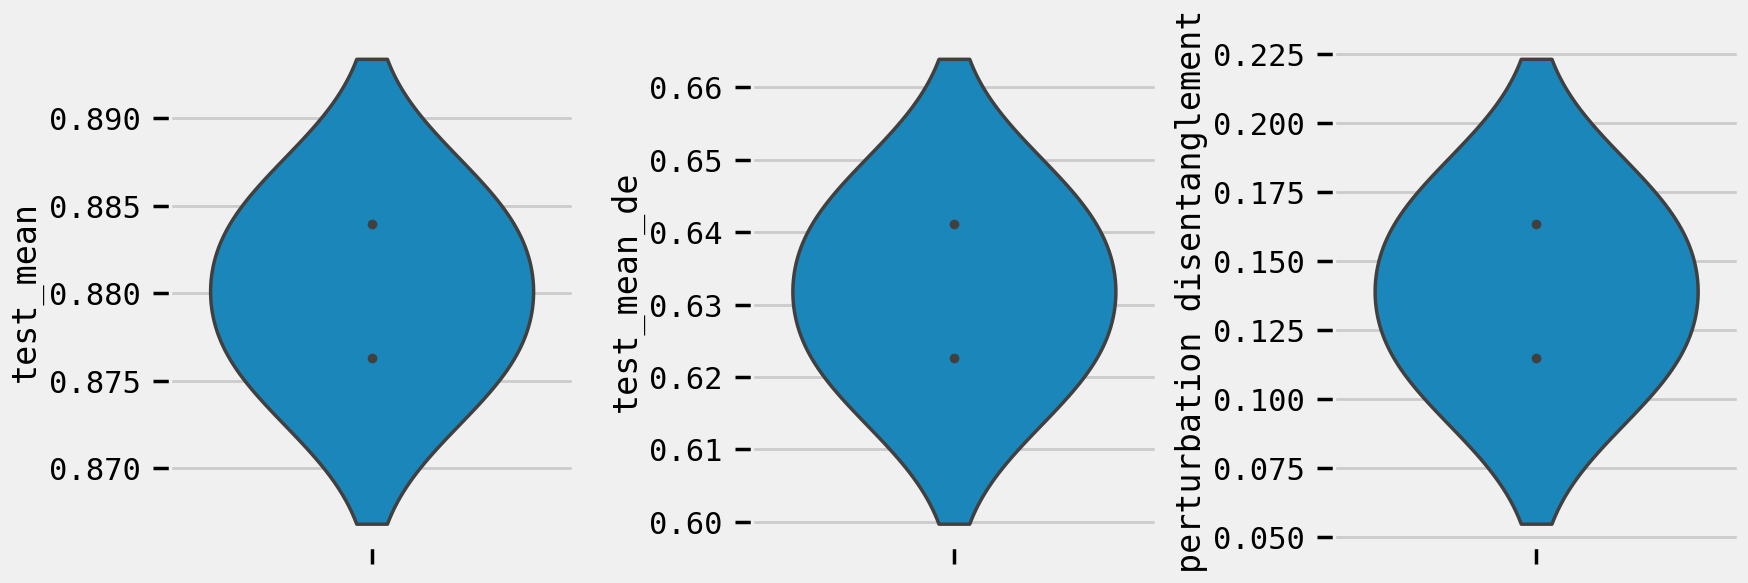

In [15]:
# All genes, DE genes, disentanglement
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(6*cols,6*rows))

for i, y in enumerate(["result.test_mean", "result.test_mean_de", "result.perturbation disentanglement"]):
    sns.violinplot(data=best, x="config.model.embedding.model", y=y, inner='points', ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])

plt.tight_layout()


## Take a deeper look in the `.config` of the best performing models

In [34]:
# -> Middle sized autoencoder width
results_clean['config.model.hparams.autoencoder_width'].value_counts()

512    13
256     7
128     5
Name: config.model.hparams.autoencoder_width, dtype: int64

In [35]:
# -> rather high regularisation
results_clean['config.model.hparams.reg_adversary'].sort_values(ascending=False)[:10]

11    91.380139
1     86.273583
7     66.971674
12    60.534485
2     44.803927
9     41.705532
20    31.261440
8     30.271829
3     30.049874
17    24.082073
Name: config.model.hparams.reg_adversary, dtype: float64